In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("hearing_test.csv")
df.head()

age  physical_score  test_result
0 33.000          40.700            1
1 50.000          37.200            1
2 52.000          24.700            0
3 56.000          31.000            0
4 35.000          42.900            1

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
# lokum gibi data(cicek gibi)

In [5]:
df.describe().T

count   mean    std    min    25%    50%    75%    max
age            5000.000 51.609 11.287 18.000 43.000 51.000 60.000 90.000
physical_score 5000.000 32.760  8.170 -0.000 26.700 35.300 38.900 50.000
test_result    5000.000  0.600  0.490  0.000  0.000  1.000  1.000  1.000

In [6]:
df["test_result"].value_counts() # Data Balance mi Unbalance mi?

1    3000
0    2000
Name: test_result, dtype: int64

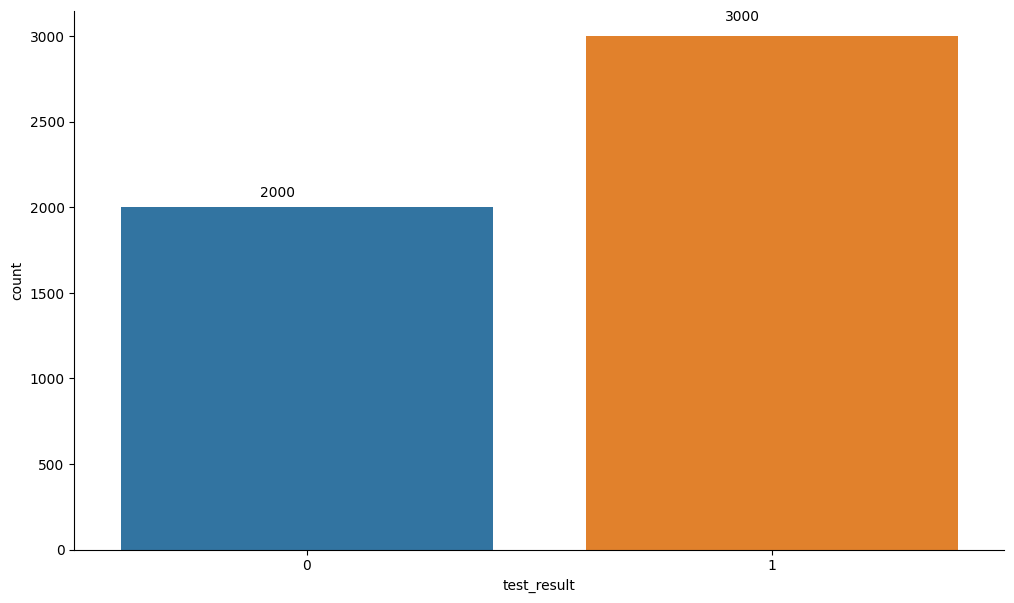

In [7]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

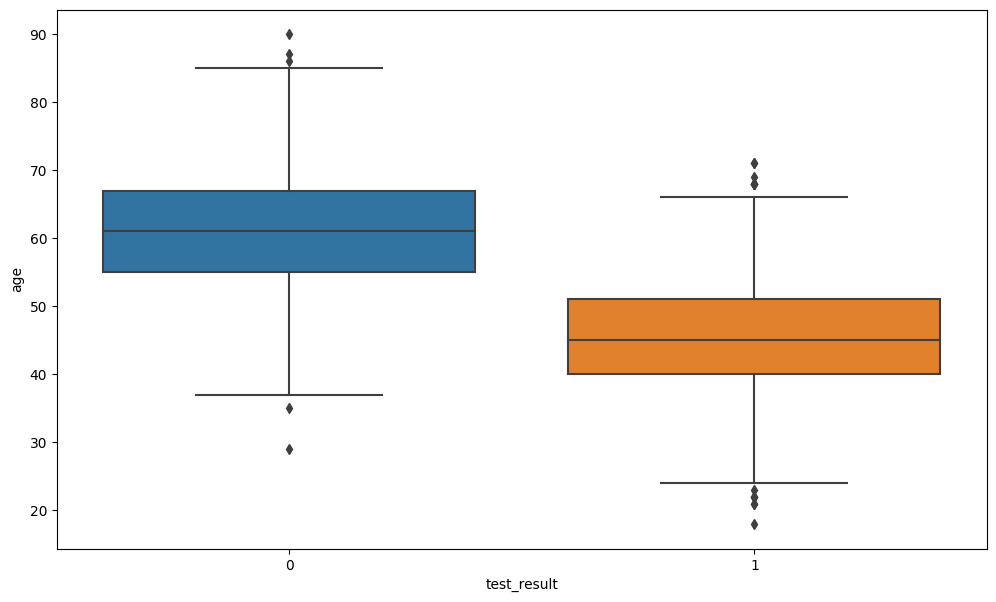

In [8]:
sns.boxplot(x='test_result', y= "age", data=df);

In [9]:
# print(sns.__version__) 
# !pip install seaborn==0.11.2
# import seaborn as sns

In [10]:
# !pip install pandas==1.4.3

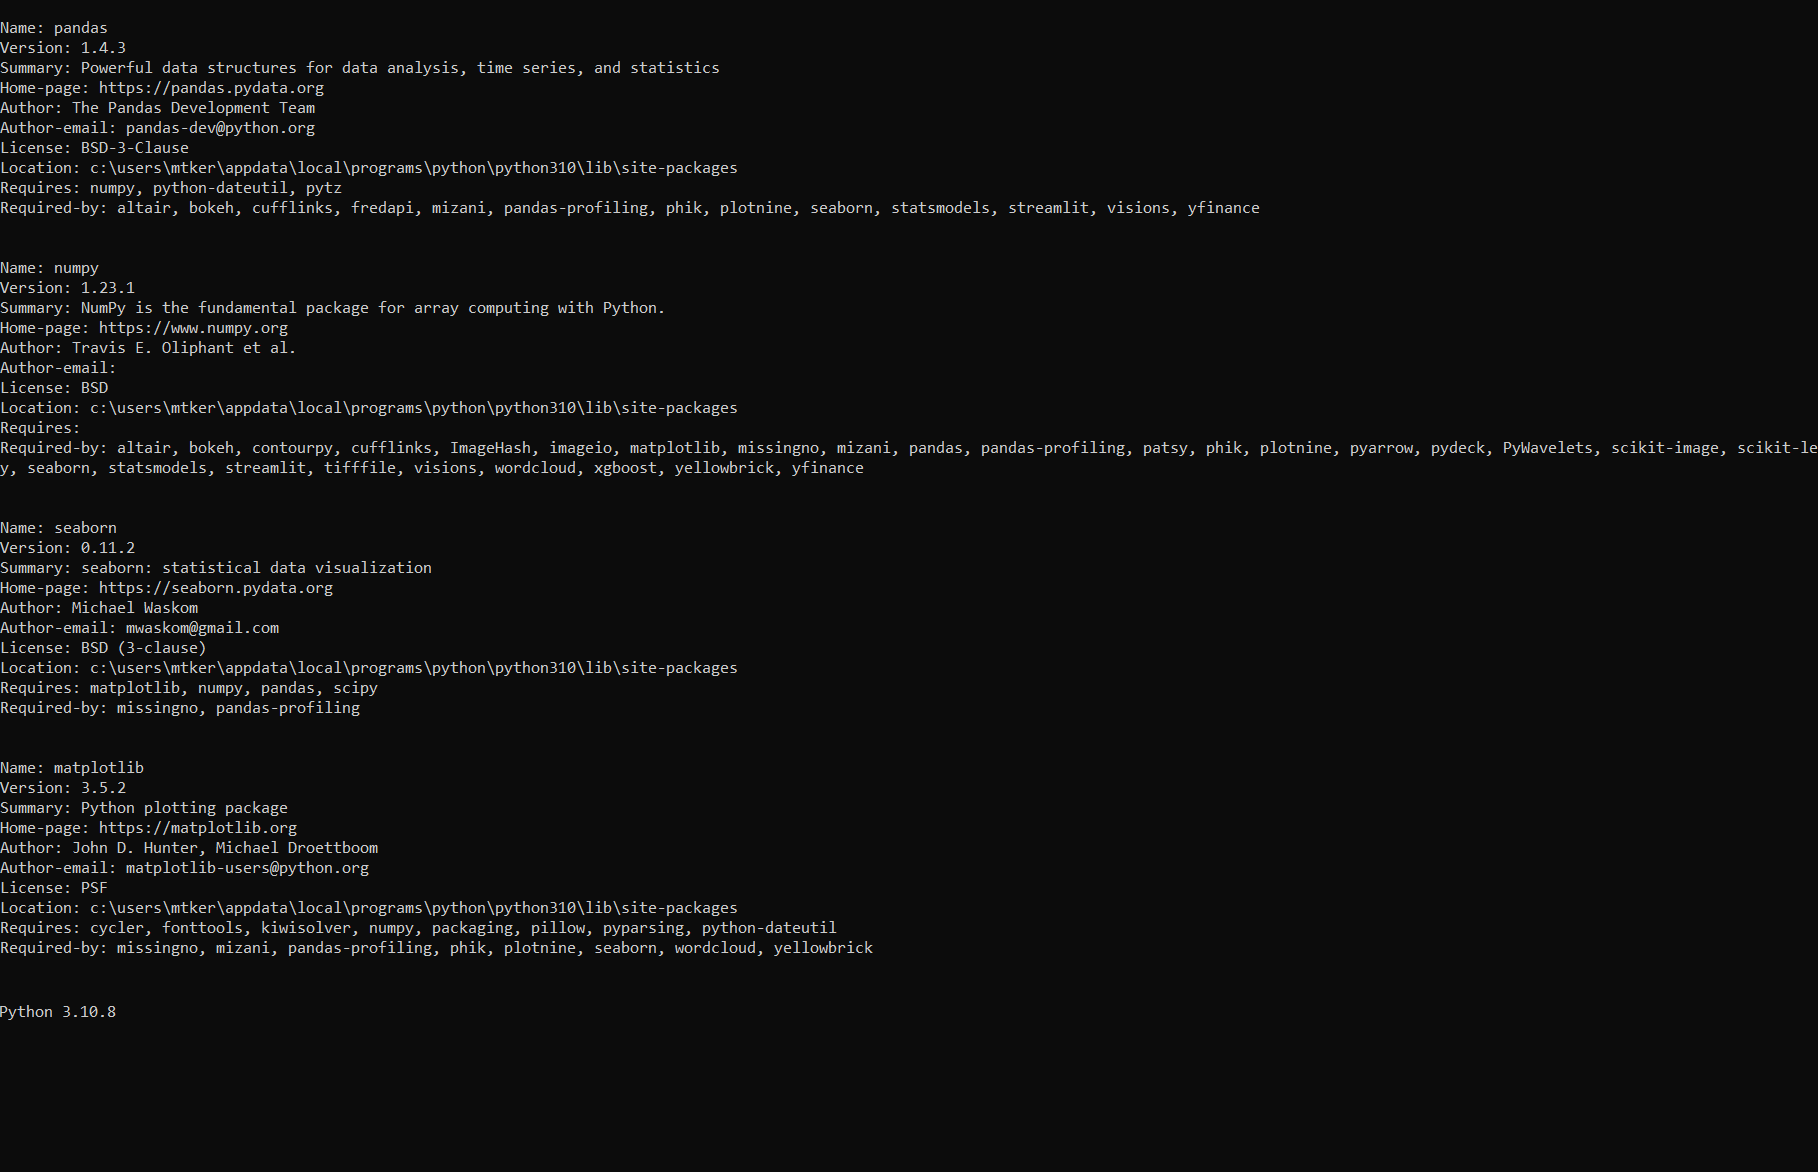

In [11]:
# !pip install numpy==1.23.1

In [12]:
# print(np.__version__)

In [13]:
# print(pd.__version__)

In [14]:
# !pip install numpy==1.23.1

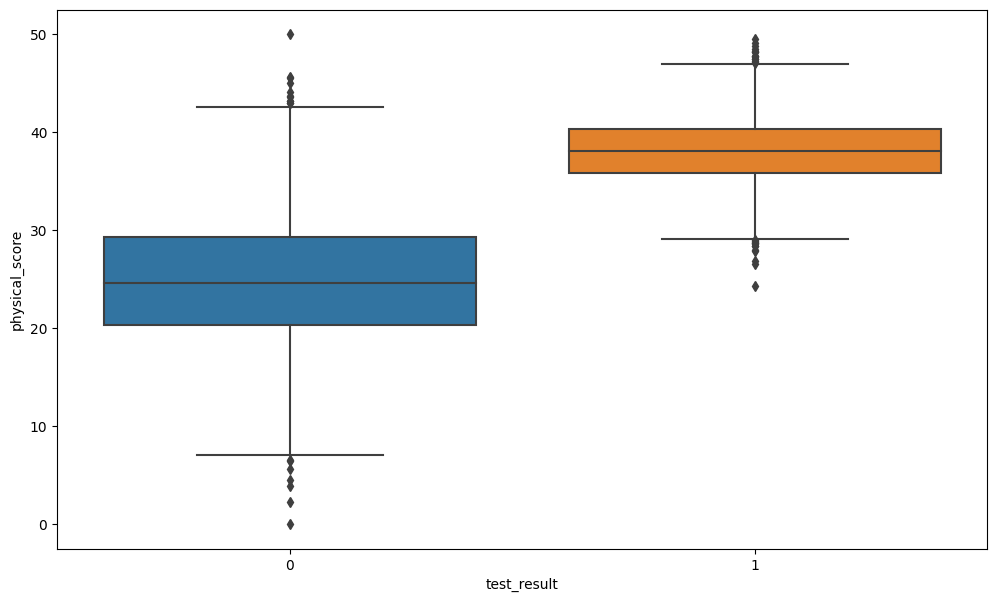

In [15]:
sns.boxplot(x='test_result', y='physical_score', data=df);

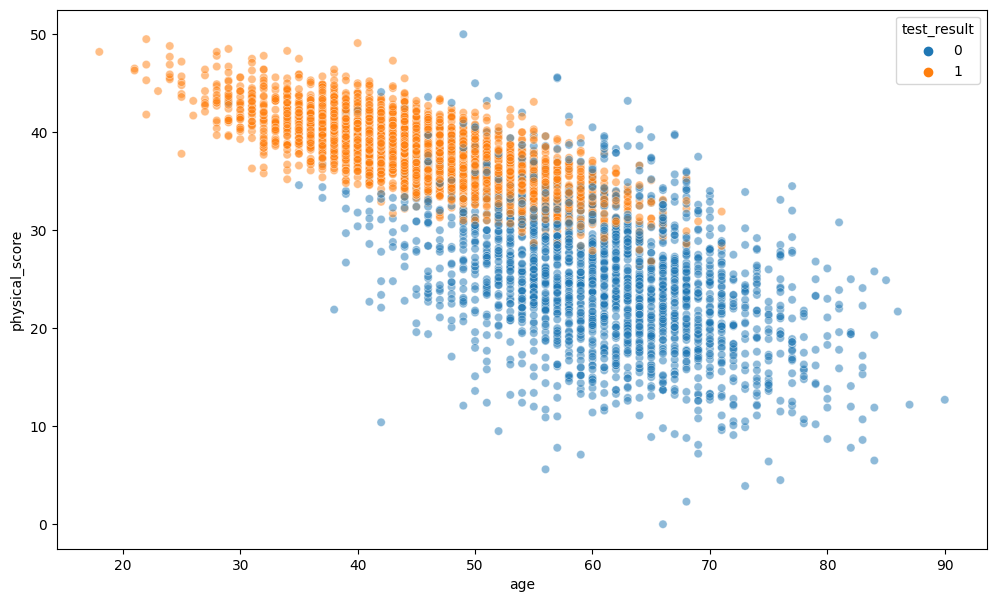

In [16]:
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.5); ## hue paramtresine her zaman taget ver

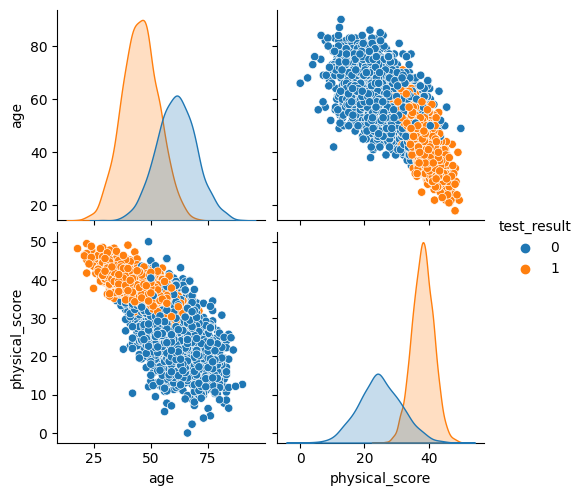

In [17]:
sns.pairplot(df, hue= "test_result");

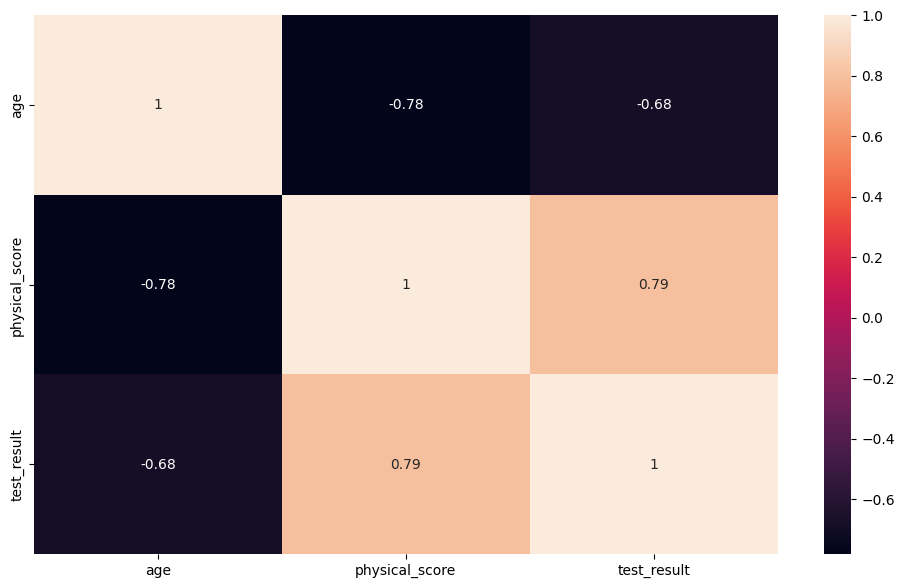

In [18]:
sns.heatmap(df.corr(), annot= True);

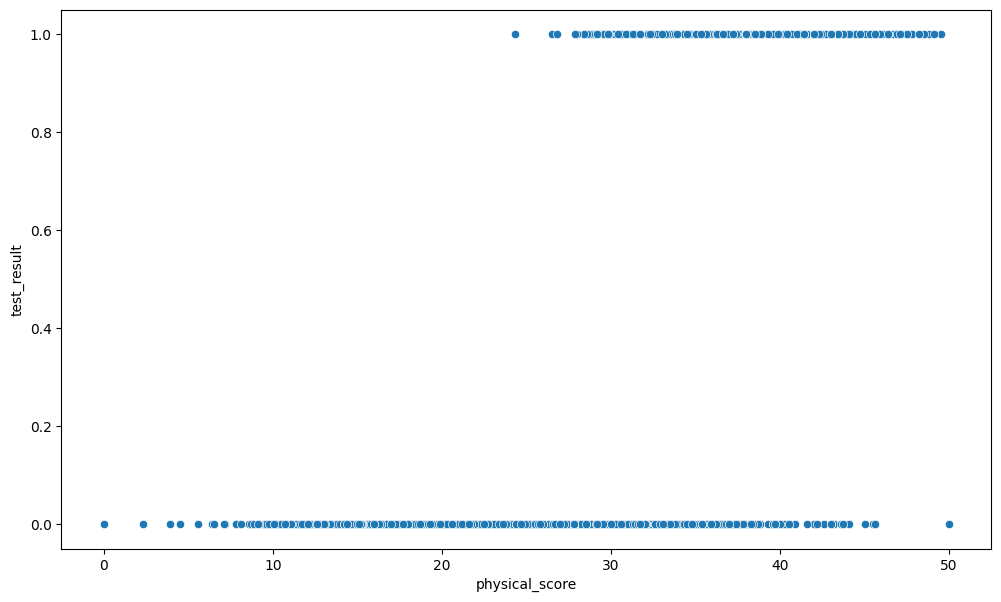

In [19]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

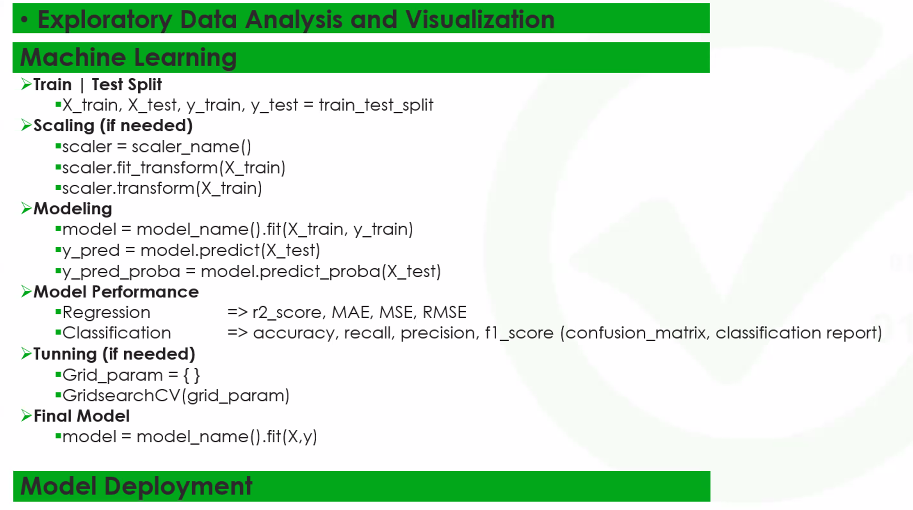

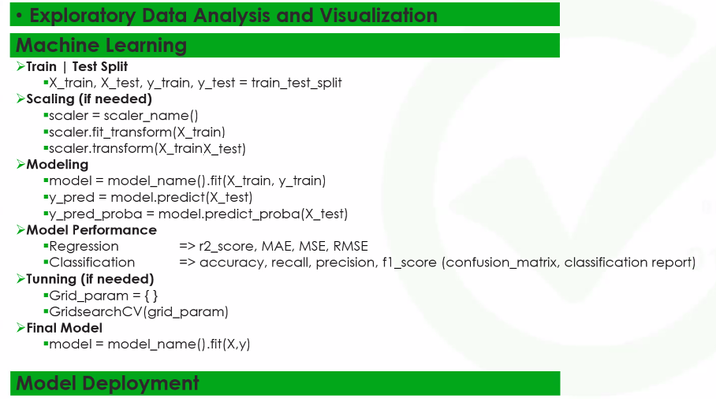

Bu sonradan duzeltilen

# Train | Test Split and Scaling

In [20]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# test size == > amacımız train setine eğitim için maximum veri sağlamak olmalı.  ben %20  ile gittim hoca %10 ile

# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train) #scale fit işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test)

# Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(X_train_scaled, y_train) 

LogisticRegression()

In [28]:
log_model.coef_  # Normalde bakmayacaz sadece ilk defa oldugundan bakiyoruz

array([[-0.903313  ,  3.48541689]])

In [29]:
log_model.intercept_

array([0.47858594])

In [30]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [31]:
y_pred_proba = log_model.predict_proba(X_test_scaled) # Olasilik hesaplarini gormek icin kullanilan code
y_pred_proba  # ilk derse ozel sonradan buna bakmayacagiz

array([[0.02440335, 0.97559665],
       [0.02676148, 0.97323852],
       [0.98932428, 0.01067572],
       ...,
       [0.0240031 , 0.9759969 ],
       [0.94898369, 0.05101631],
       [0.22360865, 0.77639135]])

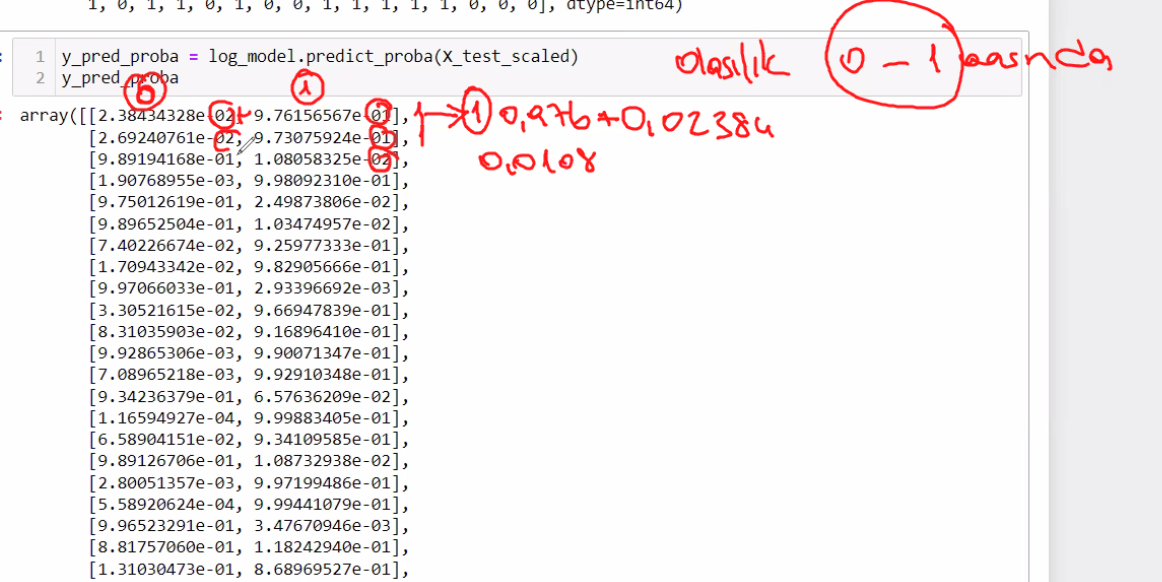
%10 icin

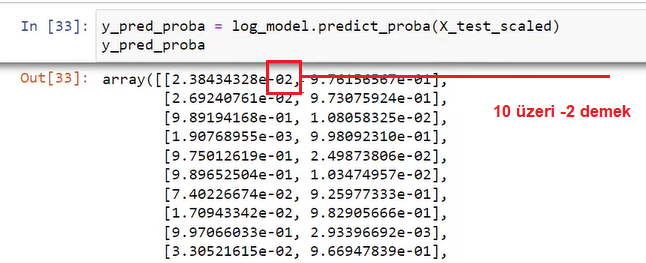

In [32]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

age  physical_score  test_result
1718 39.000          37.800            1
2511 45.000          38.700            1
345  56.000          21.800            0
2521 40.000          44.000            1
54   64.000          25.400            0
...     ...             ...          ...
3900 71.000          23.300            0
3753 51.000          32.600            1
3582 42.000          38.400            1
2392 52.000          24.800            0
3343 54.000          34.900            1

[1000 rows x 3 columns]

In [33]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

age  physical_score  test_result  pred_proba
1718 39.000          37.800            1       0.976
2511 45.000          38.700            1       0.973
345  56.000          21.800            0       0.011
2521 40.000          44.000            1       0.998
54   64.000          25.400            0       0.026
...     ...             ...          ...         ...
3900 71.000          23.300            0       0.006
3753 51.000          32.600            1       0.622
3582 42.000          38.400            1       0.976
2392 52.000          24.800            0       0.051
3343 54.000          34.900            1       0.776

[1000 rows x 4 columns]

In [34]:
test_data["pred"] = y_pred
test_data

age  physical_score  test_result  pred_proba  pred
1718 39.000          37.800            1       0.976     1
2511 45.000          38.700            1       0.973     1
345  56.000          21.800            0       0.011     0
2521 40.000          44.000            1       0.998     1
54   64.000          25.400            0       0.026     0
...     ...             ...          ...         ...   ...
3900 71.000          23.300            0       0.006     0
3753 51.000          32.600            1       0.622     1
3582 42.000          38.400            1       0.976     1
2392 52.000          24.800            0       0.051     0
3343 54.000          34.900            1       0.776     1

[1000 rows x 5 columns]

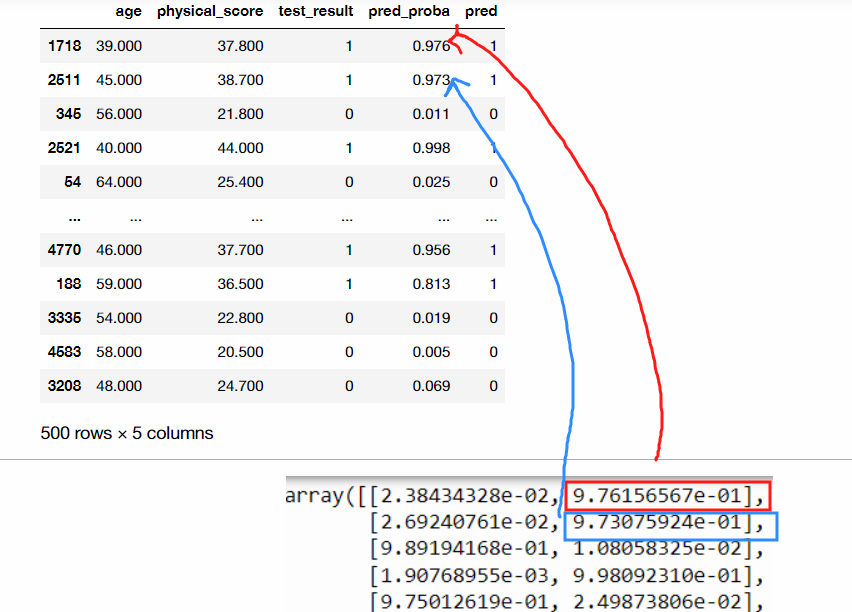

In [35]:
test_data.sample(20)

age  physical_score  test_result  pred_proba  pred
3940 50.000          38.100            1       0.950     1
2082 50.000          40.100            1       0.978     1
2952 39.000          38.600            1       0.983     1
1835 37.000          38.000            1       0.981     1
4611 40.000          36.000            1       0.945     1
934  55.000          32.200            1       0.502     1
4837 65.000          17.000            0       0.001     0
1329 59.000          33.900            1       0.603     1
587  33.000          45.600            1       0.999     1
3480 63.000          14.900            0       0.000     0
2529 46.000          37.600            1       0.954     1
2306 55.000          38.100            1       0.927     1
613  73.000          18.900            0       0.001     0
647  75.000          14.300            0       0.000     0
2069 68.000          15.800            0       0.000     0
3537 30.000          40.100            1       0.995     1
3123 54.000          36.500            1       0.873     1
2661 46.000          40.700            1       0.988     1
3310 47.000          37.600            1       0.951     1
2378 45.000          38.900            1       0.975     1

adem hoca
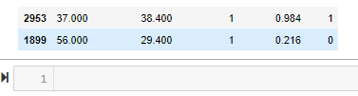

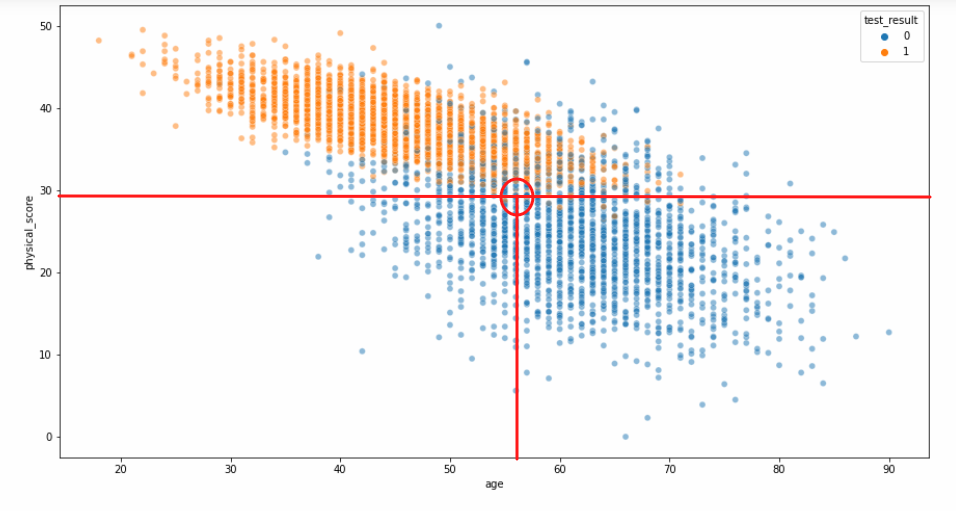


   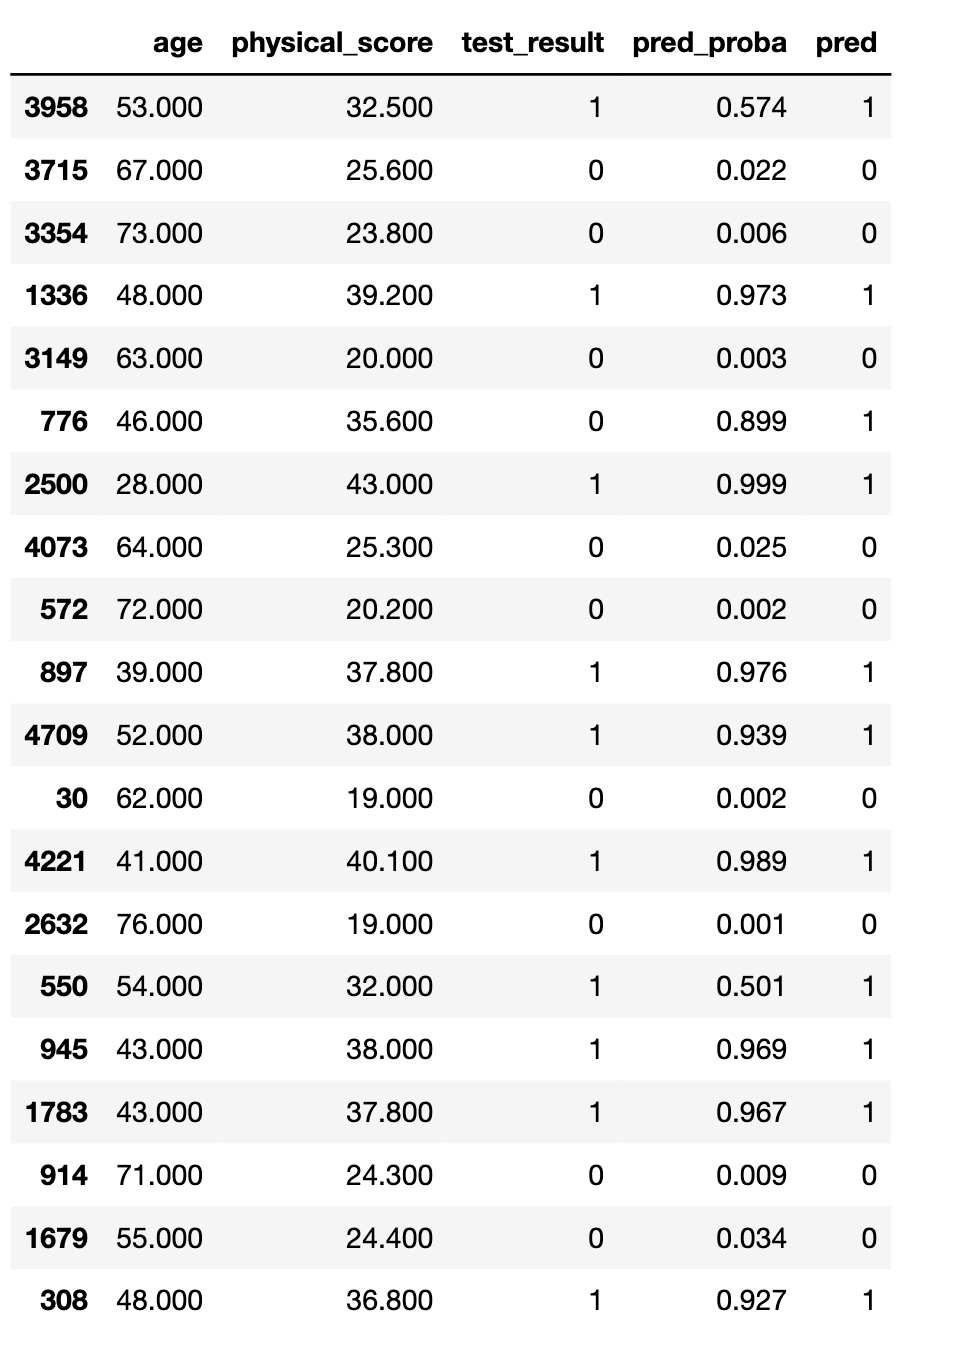 

In [36]:
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

# tüm hatalar için

age  physical_score  test_result  pred_proba  pred
2371 46.000          36.400            0       0.926     1
618  63.000          33.400            1       0.470     0
2145 65.000          35.200            0       0.621     1
3200 60.000          32.900            1       0.477     0
1726 46.000          36.700            0       0.934     1
...     ...             ...          ...         ...   ...
2420 60.000          32.500            1       0.434     0
3917 48.000          33.400            0       0.747     1
2452 61.000          33.600            0       0.532     1
1845 50.000          31.900            0       0.569     1
4273 58.000          33.900            0       0.622     1

[83 rows x 5 columns]

In [37]:
test_data.sample(20)

age  physical_score  test_result  pred_proba  pred
2008 49.000          34.500            1       0.814     1
4223 32.000          45.300            1       0.999     1
4765 71.000          17.300            0       0.000     0
4837 65.000          17.000            0       0.001     0
1689 43.000          39.200            1       0.981     1
3928 58.000          31.100            1       0.331     0
2326 46.000          36.600            1       0.932     1
2777 52.000          27.600            0       0.151     0
3747 24.000          45.900            1       1.000     1
1595 37.000          42.000            1       0.996     1
754  60.000          26.800            0       0.063     0
670  34.000          38.700            1       0.989     1
4755 62.000          27.700            0       0.077     0
1718 39.000          37.800            1       0.976     1
639  54.000          39.300            1       0.958     1
4639 47.000          37.800            1       0.955     1
2036 49.000          37.900            1       0.949     1
3047 42.000          36.300            1       0.943     1
3993 45.000          38.700            1       0.973     1
4665 59.000          27.500            0       0.089     0

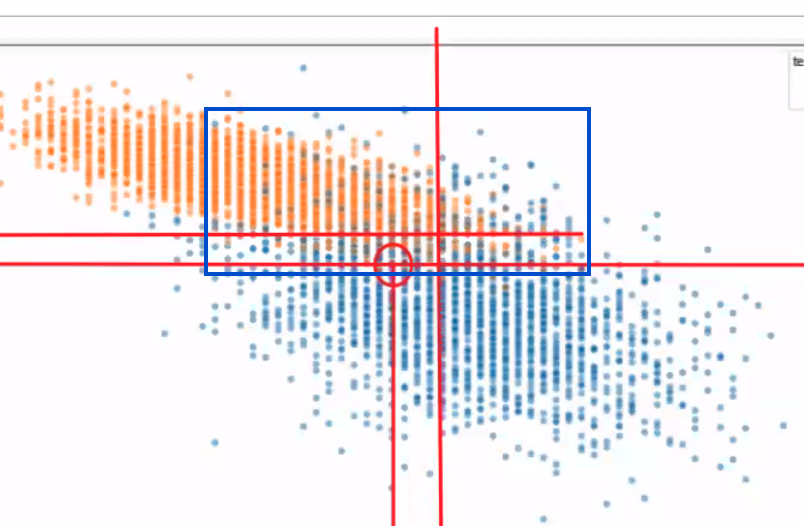

# Model Performance on Classification Tasks

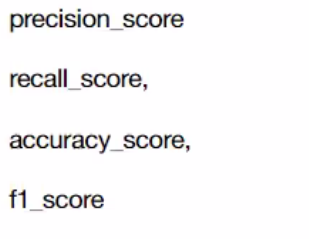

In [38]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

## Doğruluk (Accuracy)

Doğruluk (Accuracy): Modelin doğru tahmin ettiği örneklerin oranıdır. Doğruluğun maksimum değeri 1 olabilir. Örneğin, 100 örneğin 80'inin doğru sınıflandırıldığı bir modelin doğruluk skoru 0.8 olacaktır. Aşağıdaki formülden de anlaşılacağı üzere doğruluk doğru bilinen tahminlerin tüm tahminlere oranı olarak ifade edilebilir.

In [39]:
accuracy_score(y_test, y_pred)

0.917

In [40]:
log_model.score(X_test_scaled, y_test) # log_model içine x ve y testleri alır. accuracy_score ile aynı değerleri verir.

0.917

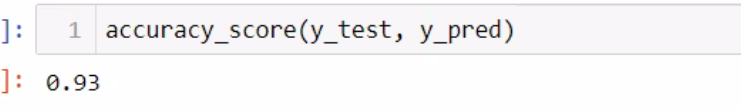

%10

https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C4%B1n%C4%B1fland%C4%B1rma-modelleri-accuracy-precission-recall-f1-score-log-loss-and-e2c37fbcf285

#  Precision (Hassasiyet)

Hassasiyet (Precision): Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Hassasiyet modelin pozitif sınıfı doğru sınıflandırma yeteneğini ölçmektedir. Hassasiyet skoru, yanlış pozitif sınıflandırmaların sayısını (yanlış pozitifler) gerçek pozitif sınıflandırmaların sayısına (doğru pozitifler) oranlaması ile hesaplanmaktadır. Aşağıdaki formülden de anlaşılacağı üzere hassasiyet pozitif olarak doğru bilinen tahminlerin tüm pozitif tahminlere oranı olarak ifade edilebilir.

In [41]:
precision_score(y_test, y_pred) #default post_lable= 1 dir 1 klasının score verir.

0.9126365054602185

# Recall (Duyarlilik)

Duyarlılık (Recall): Gerçek pozitif örneklerin ne kadarının pozitif olarak sınıflandırıldığını gösterir. Aşağıdaki formül incelendiğinde duyarlılık, pozitif olarak doğru tahmin edilenlerin gerçek pozitiflere oranı olarak ifade edilebilir.

Formül:

Duyarlılık = TP / (TP + FN)

TP (True Positive): doğru pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.

Örnek: 100 gerçek pozitif örneğin 80'ini doğru olarak sınıflandıran bir modelin %80 duyarlılığı vardır.

In [42]:
recall_score(y_test, y_pred)

0.9558823529411765

# F1 Score ( precission / recall)

F1 Skor (F1 Score): F1 Skor ise Hassasiyet (Precision) ve Duyarlılık (Recall) skorlarının harmonik ortalamasıdır.

Formül:

F1 Skor = 2 * ((Precision * Recall) / (Precision + Recall))

Precision: Hassasiyet

Recall: Duyarlılık

Örnek: 0,8 hassasiyeti ve 0,8 geri çağırması olan bir modelin F1 puanı 0,8x0,8/(0,8+0,8) = 0,8'dir.

In [43]:
f1_score(y_test, y_pred)

0.933758978451716

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [45]:
from sklearn.metrics import confusion_matrix, classification_report # plot_confusion_matrix hata bura verdi


In [46]:
confusion_matrix(y_test, y_pred)

array([[332,  56],
       [ 27, 585]], dtype=int64)

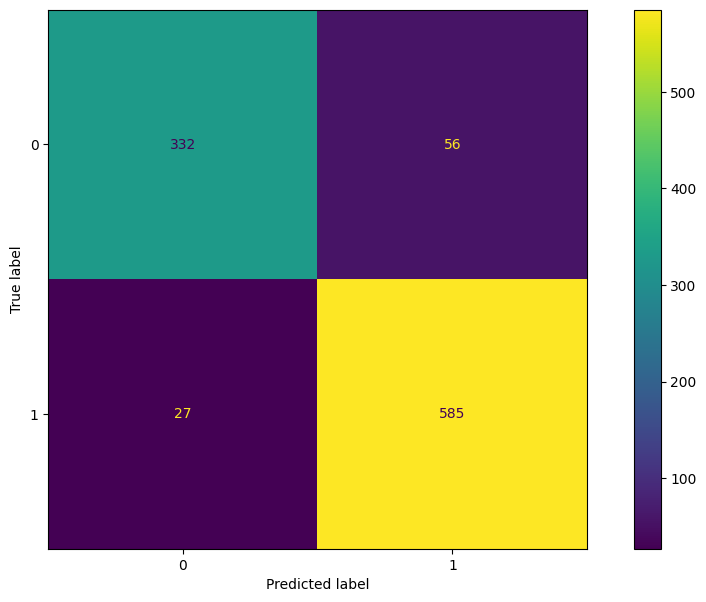

In [47]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

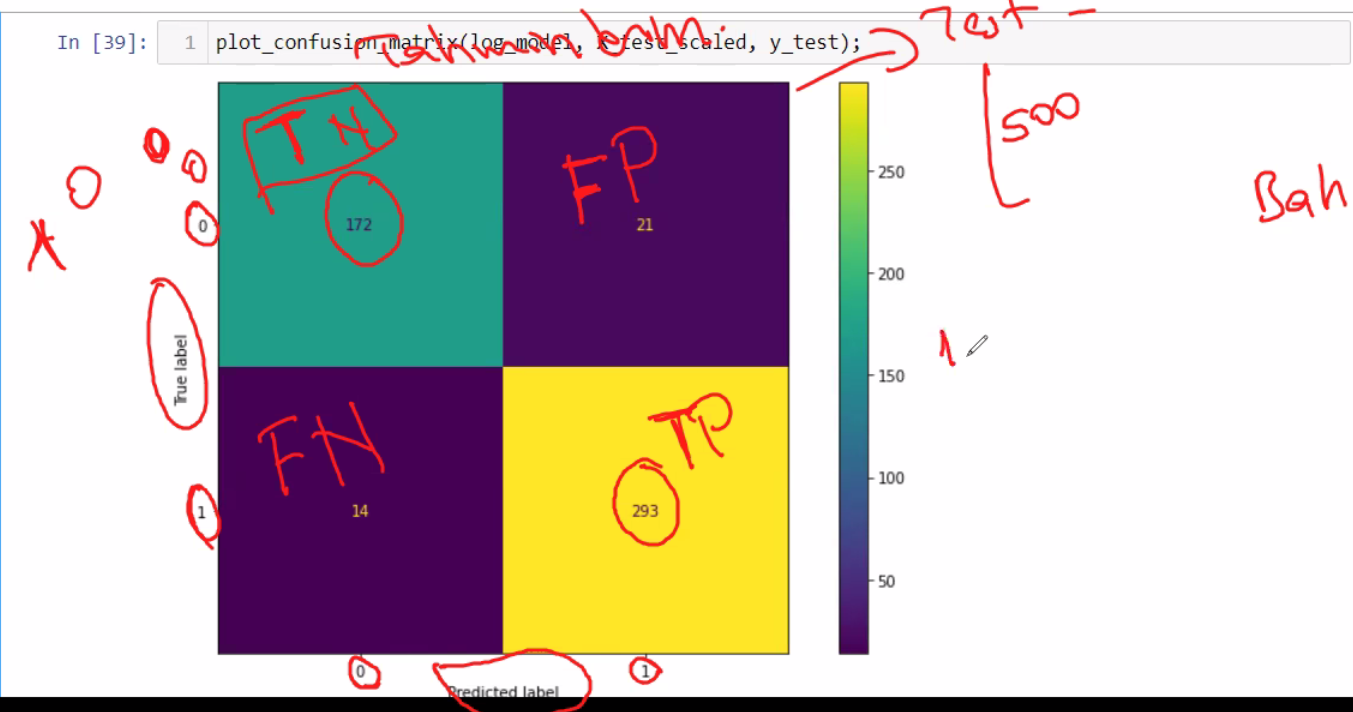

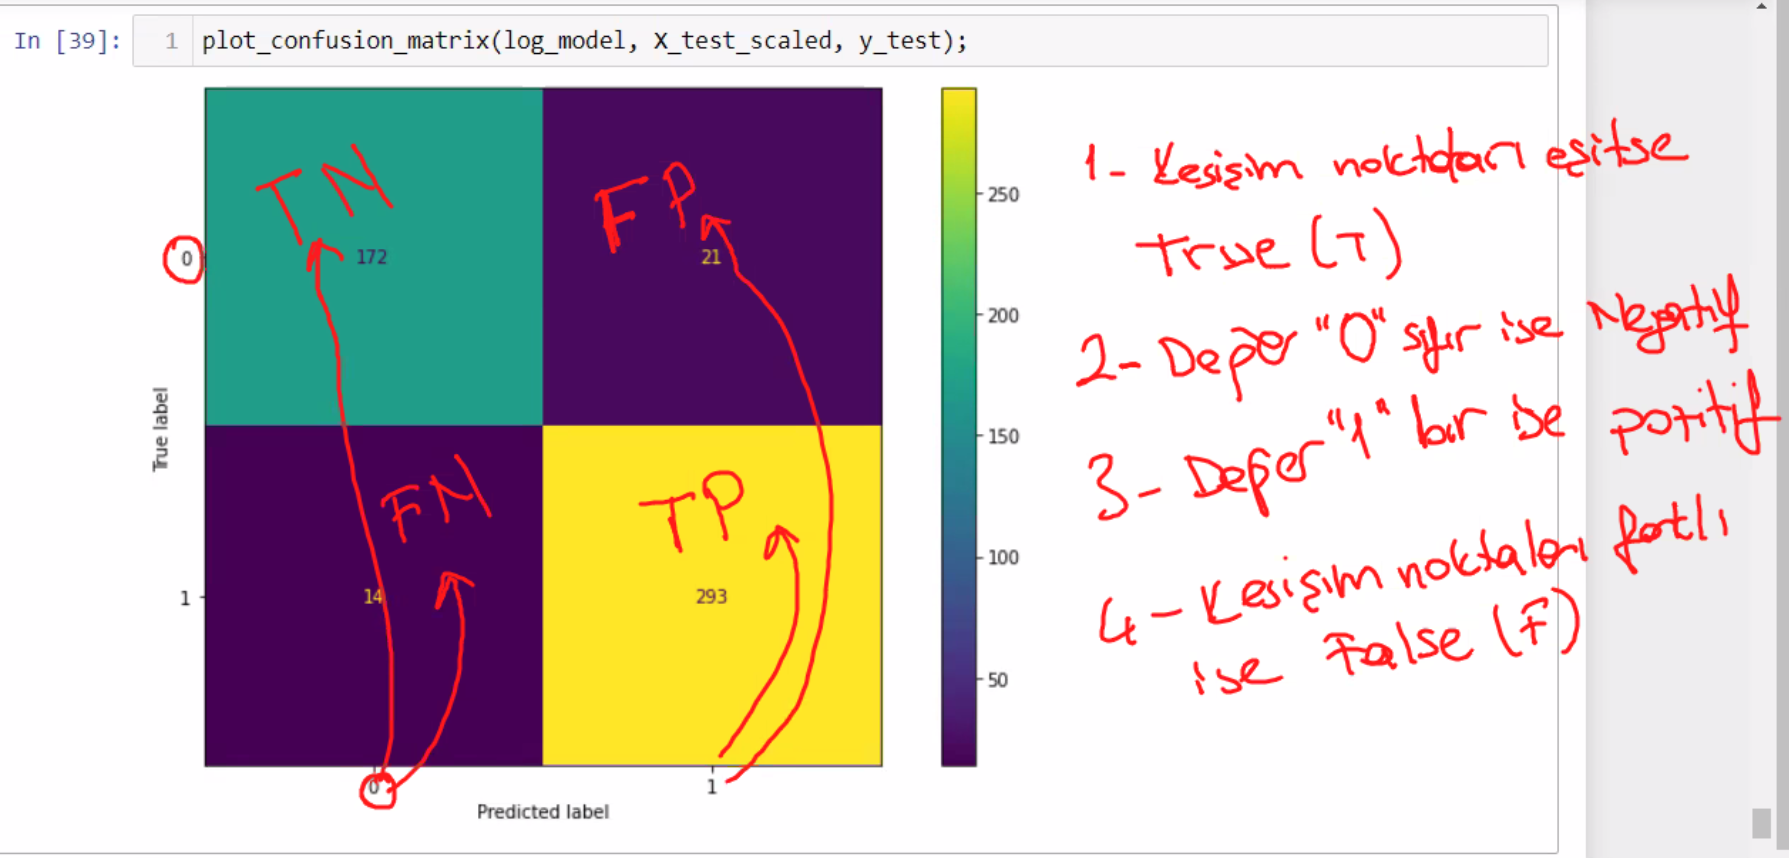

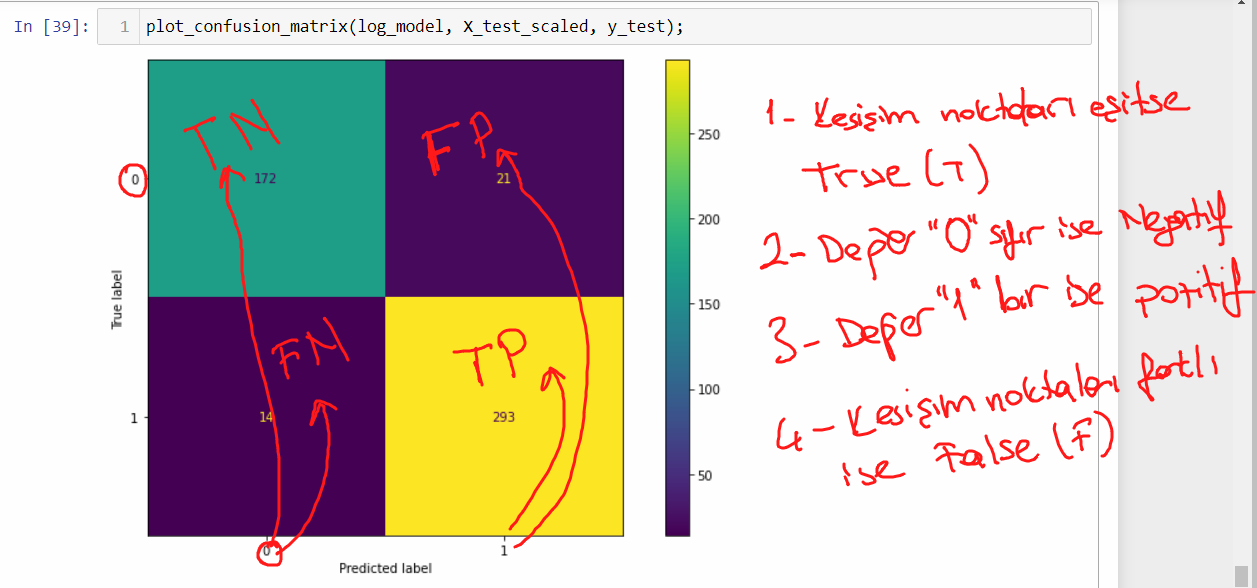

import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > (conf_matrix.max() / 2) else 'black')

    plt.show()

plot_confusion_matrix(confusion_matrix(y_test,y_pred),["0","1"])

In [48]:
# kısaca şöyle diyebilir miyiz hocam ilk harf label ikinci harf ise pred. temsil ediyor.

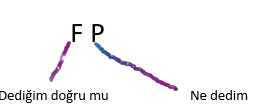

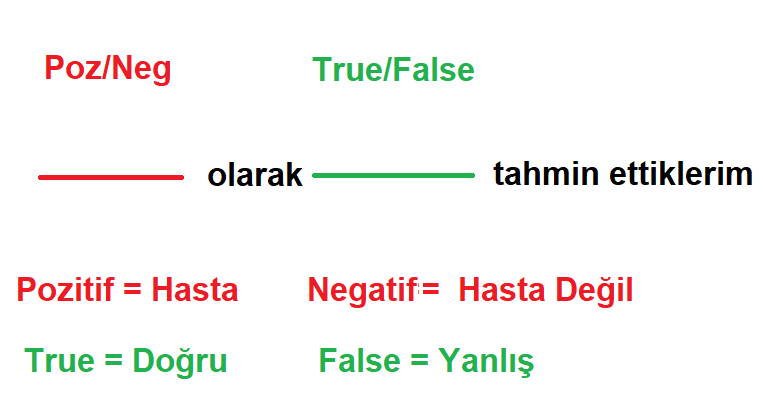

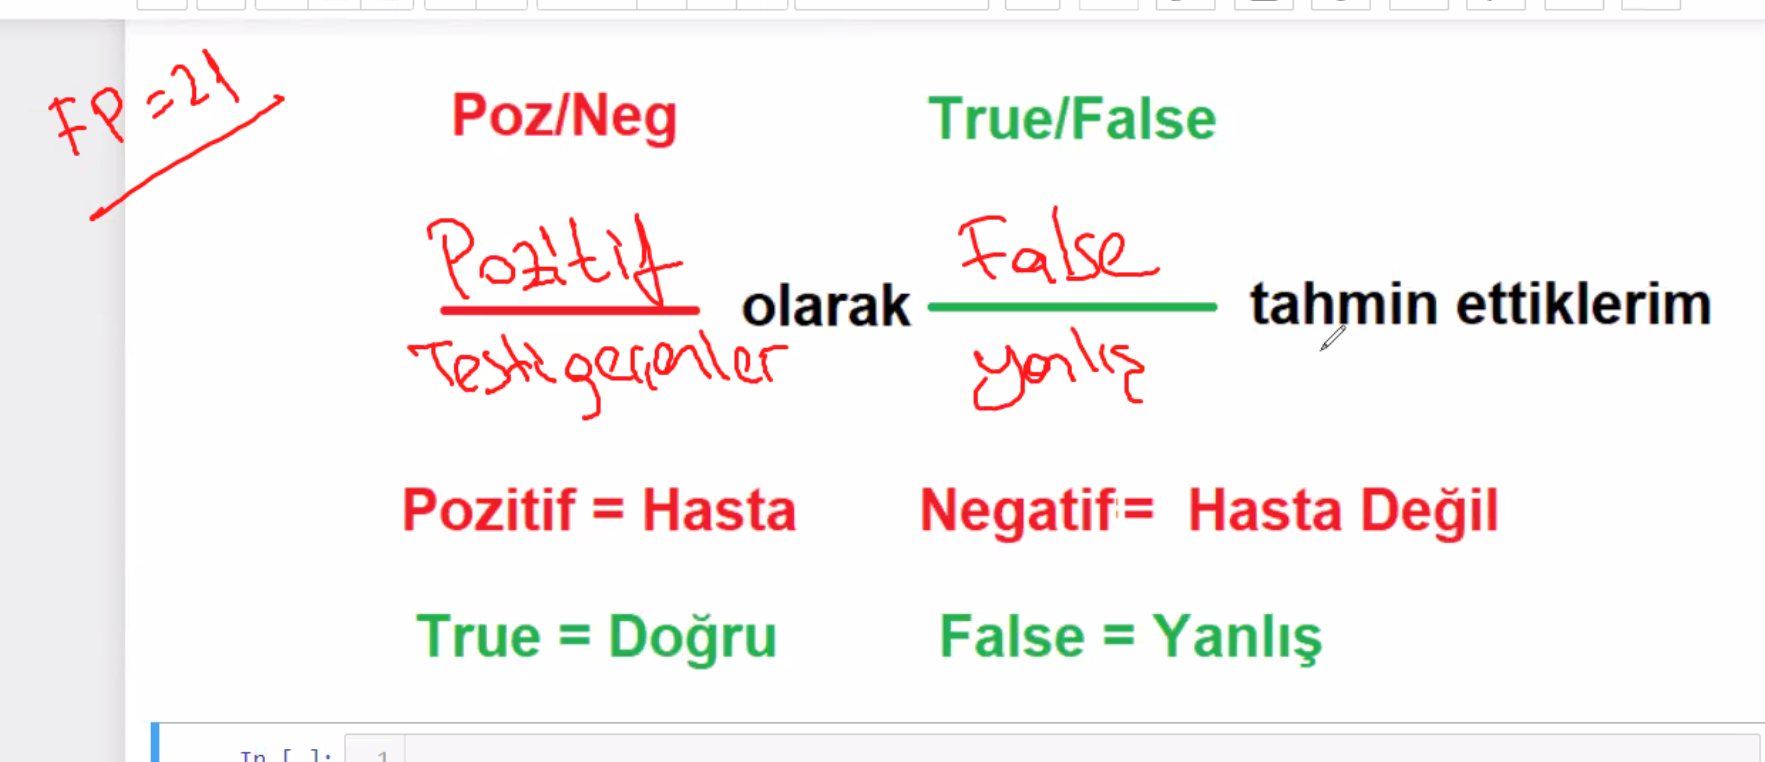

hasta yanlis tahmin

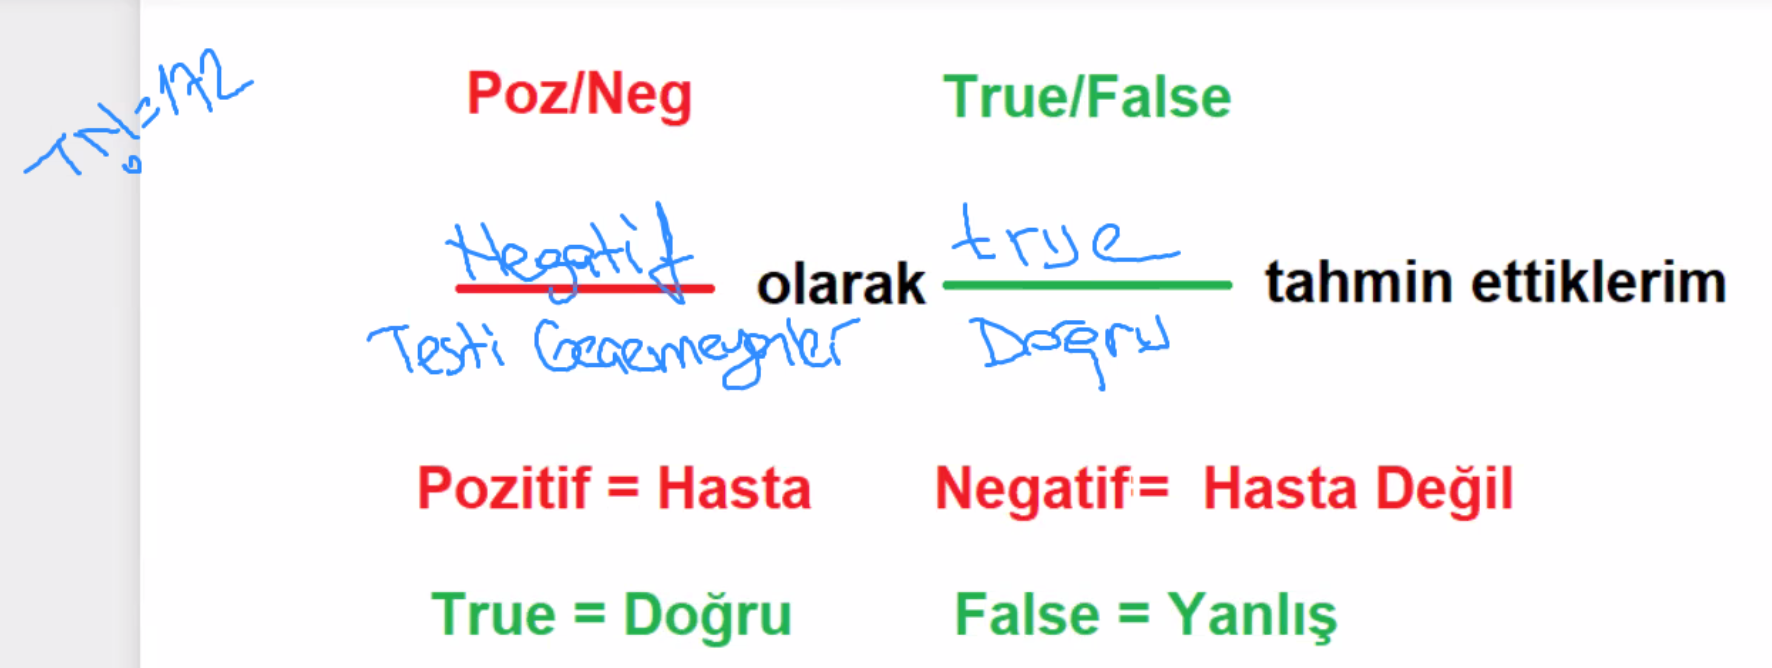

## normalize='true'
seçeneğini kullandığınızda, her satırın toplamı 1'e eşit olacak şekilde karışıklık matrisinin değerleri ölçeklendirilir. Bu, her bir gerçek sınıf için, modelin bu sınıfı doğru veya yanlış olarak ne sıklıkla tahmin ettiğini daha iyi anlamak için kullanışlıdır. Özellikle, sınıf dengesizliği olan durumlarda bu normalizasyon, her bir sınıfın performansını daha iyi değerlendirmenize olanak tanır.


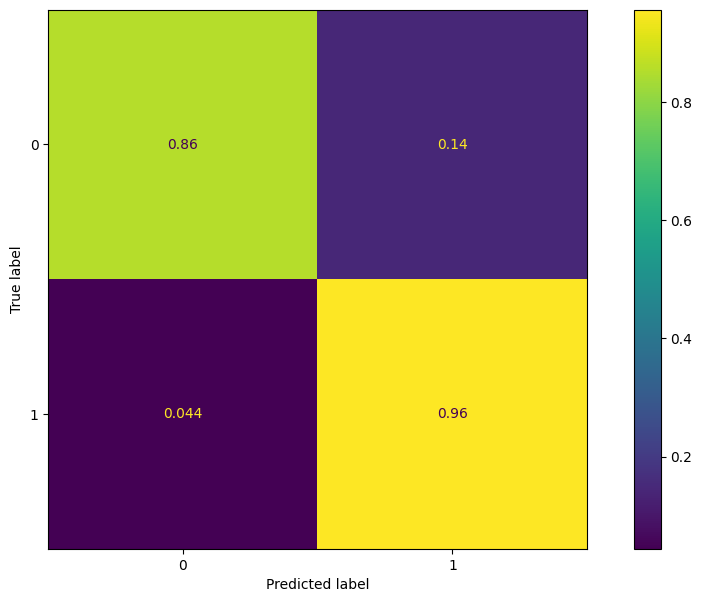

In [49]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize = 'true');

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# y_pred ve y_true sizin tahminleriniz ve gerçek değerleriniz olmalıdır
y_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

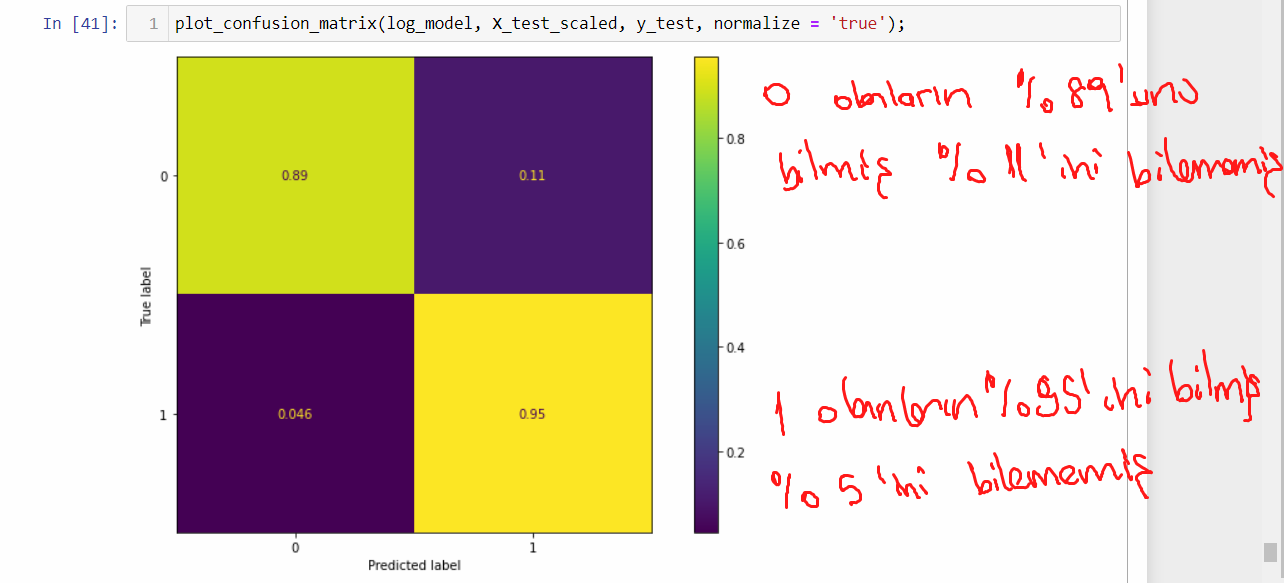

## normalize = 'pred'
normalize='pred': Matrisin değerleri, tahmin edilen sınıf etiketleri bazında normalize edilir. Yani, her sütunun toplamı 1 olacak şekilde değerler ölçeklendirilir. Bu, belirli bir sınıf olarak tahmin edilen örneklerin gerçekte hangi sınıflara ait olduğunu yüzde olarak gösterir.

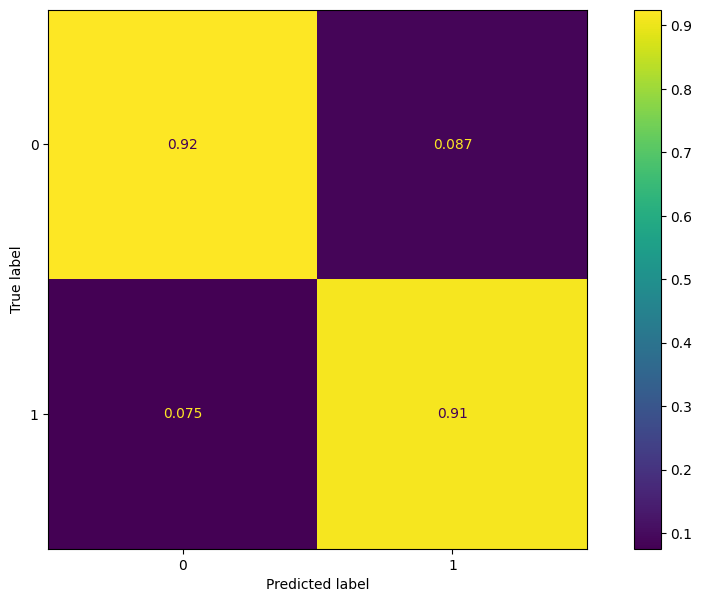

In [50]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize = 'pred');

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# y_pred ve y_true sizin tahminleriniz ve gerçek değerleriniz olmalıdır
y_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred, normalize='pred')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

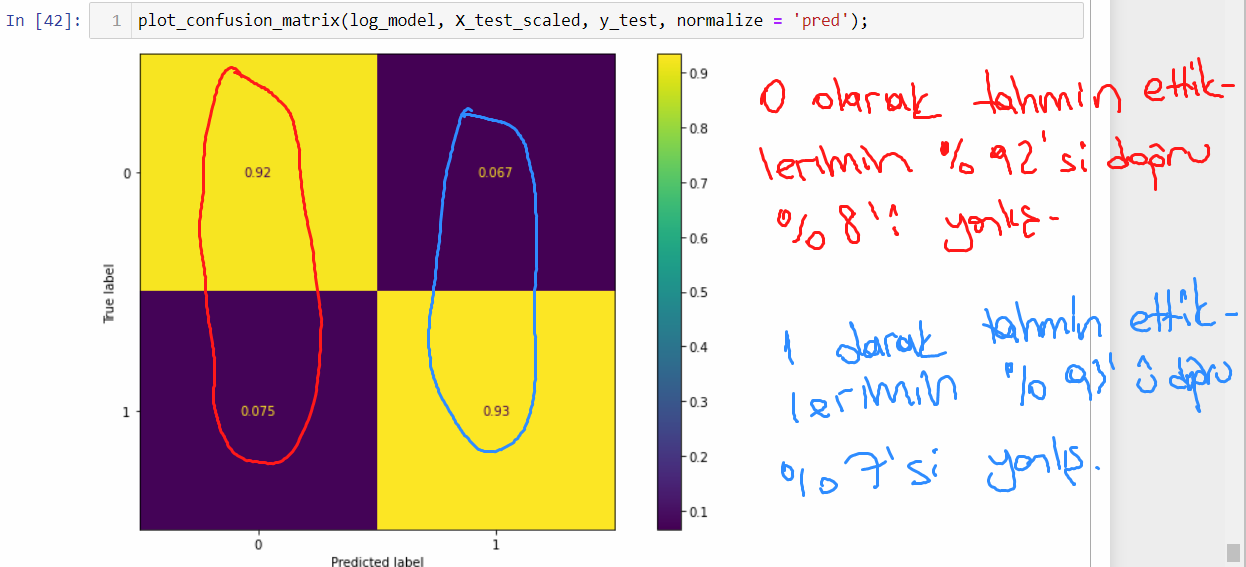

sadece bir degere bakmak dogru degil ornegin accuracy. NBurada butun degerlerin birbi ile uymlu olmasi onem arz eder. Istegimiz bu
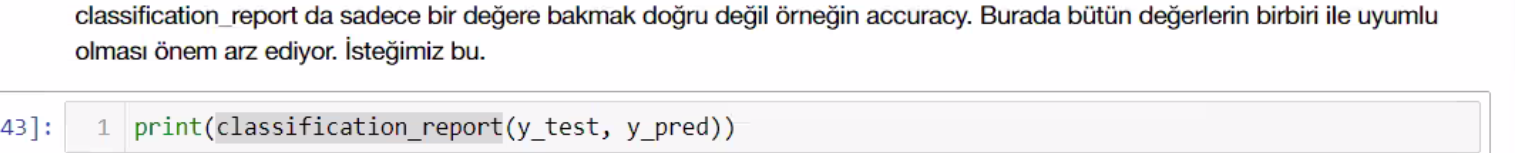

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



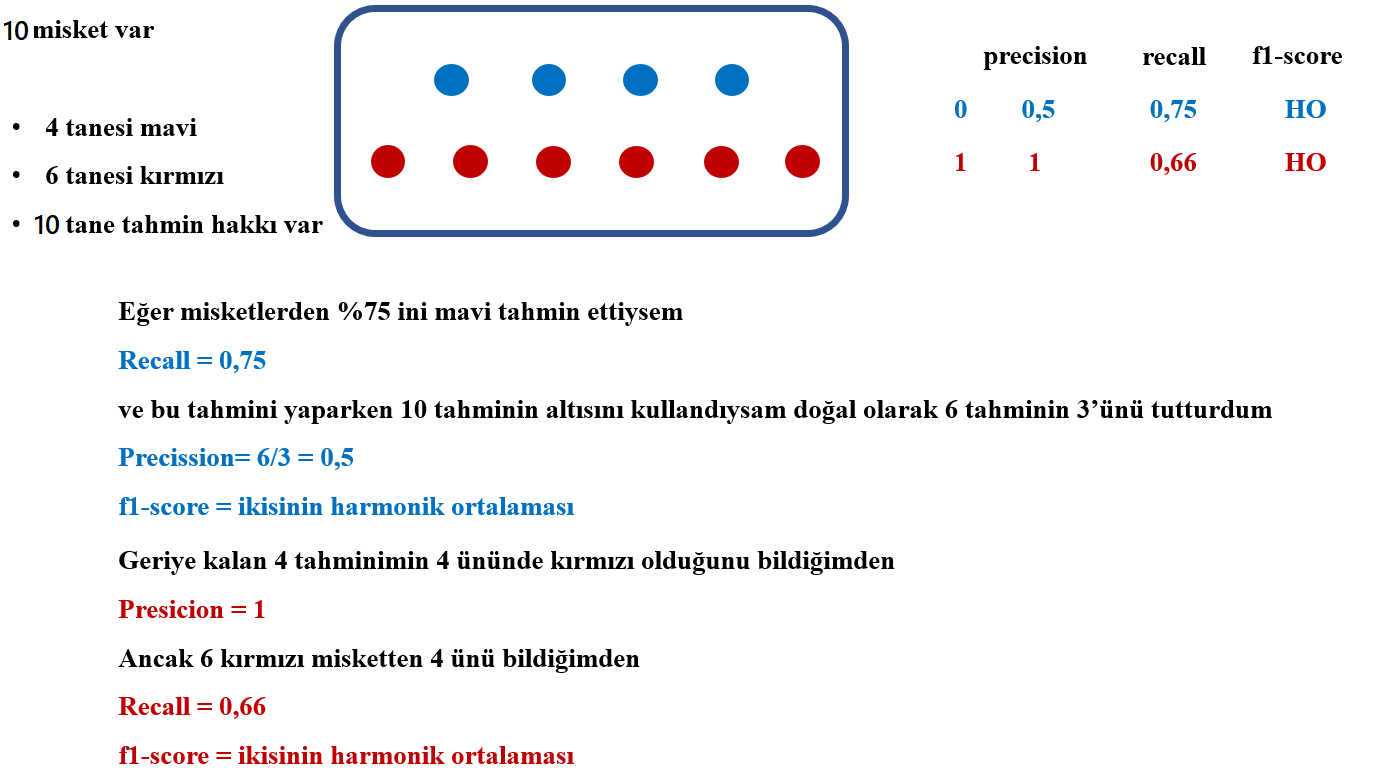

In [52]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



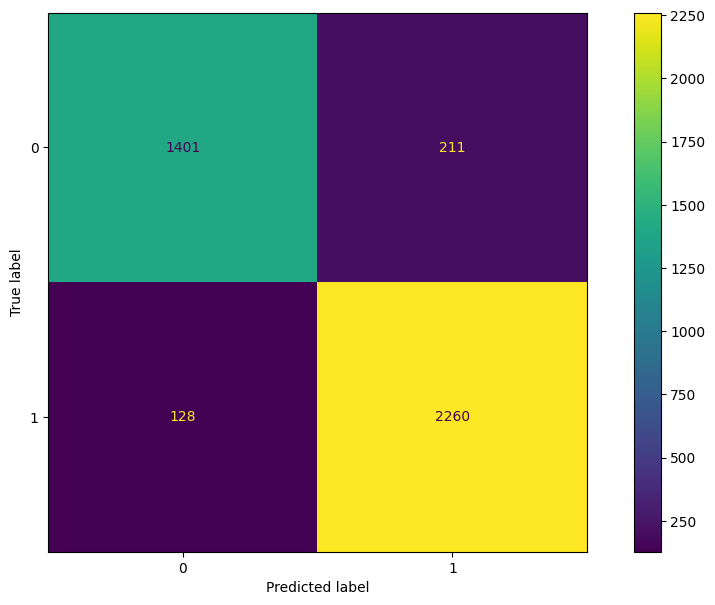

In [53]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

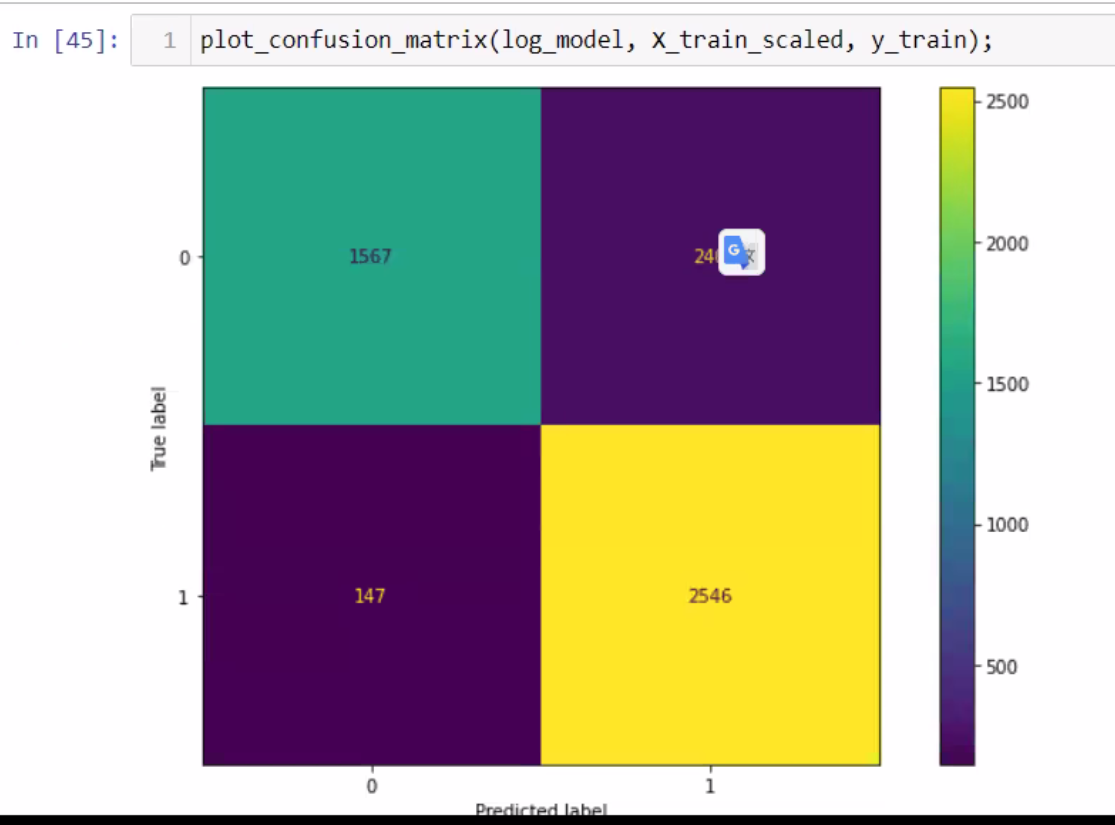

# CV

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
# print(sklearn.__version__)

In [56]:
# pip install scikit-learn==1.1.2

In [57]:
# from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [58]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.010       0.004          0.920           0.912        0.958    0.934
2      0.007       0.004          0.930           0.907        0.983    0.944
3      0.008       0.005          0.948           0.943        0.971    0.957
4      0.006       0.004          0.938           0.946        0.950    0.948
5      0.006       0.005          0.900           0.923        0.908    0.916
6      0.011       0.004          0.905           0.914        0.929    0.921
7      0.007       0.004          0.902           0.891        0.954    0.921
8      0.007       0.003          0.900           0.903        0.933    0.918
9      0.011       0.004          0.902           0.903        0.937    0.920
10     0.006       0.004          0.907           0.901        0.950    0.925

In [59]:
df_scores.mean()[2:]  # cv sonuçların ortalaması

test_accuracy    0.915
test_precision   0.914
test_recall      0.947
test_f1          0.930
dtype: float64

# Test ve train skorlarini karsilastiriyoruz

In [60]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       388
           1       0.91      0.96      0.93       612

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000

Train Set

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1612
           1       0.91      0.95      0.93      2388

    accuracy                           0.92      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.92      0.91      4000



overfitten bahsedemeyiz

Teste ait sonuclar traine ait sonuclarla uyumlu

#  ROC (Receiver Operating Curve)

In [62]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

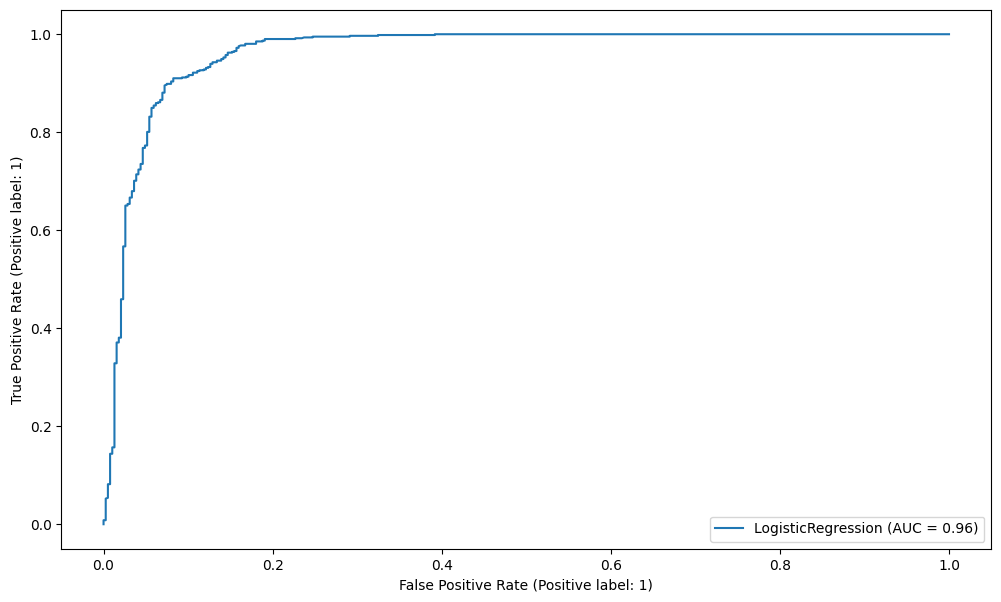

In [63]:
plot_roc_curve(log_model, X_test_scaled, y_test);

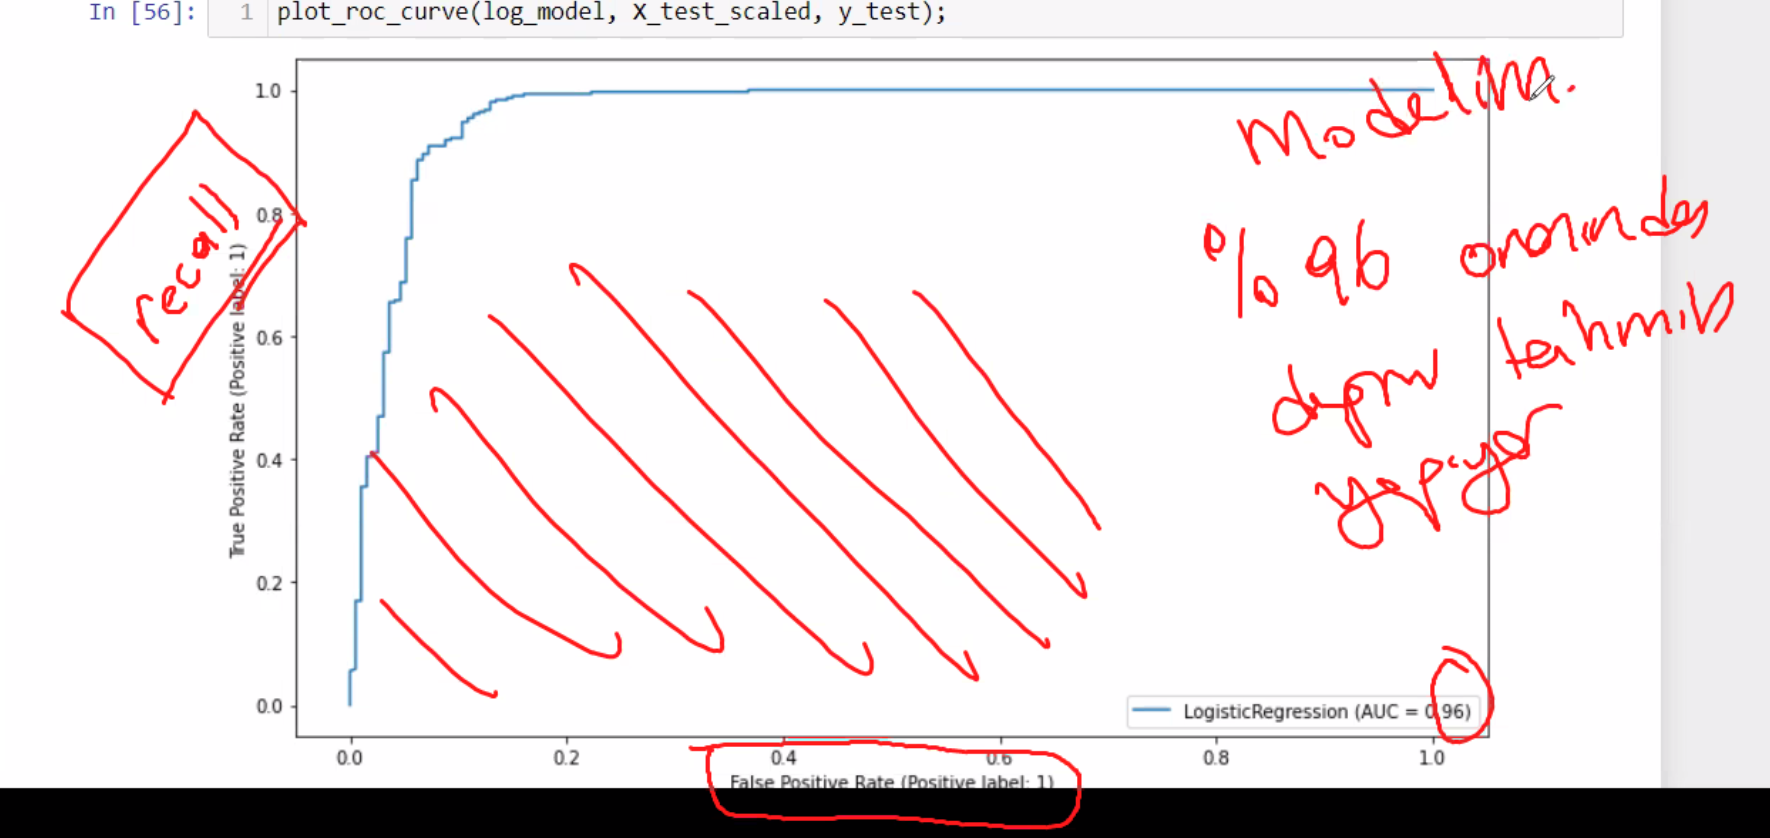

%90 uzeri cok basarili kabul ediyor literetur

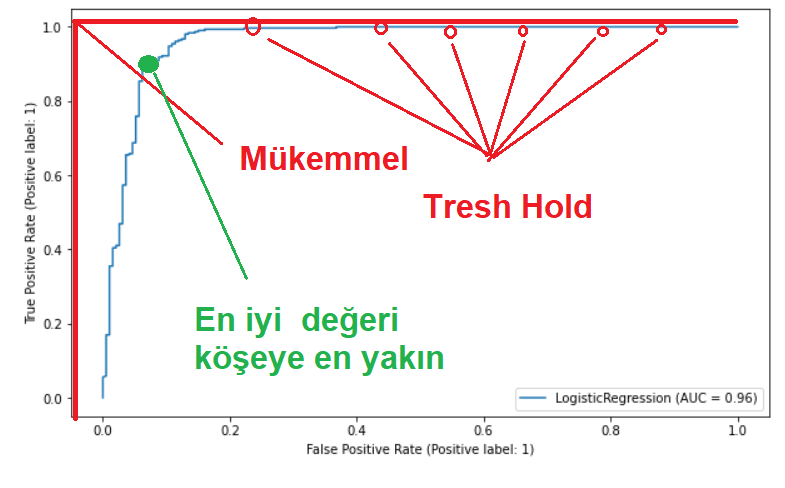

In [64]:
roc_auc_score(y_test, y_pred_proba[:,1]) #olasılıklar üzerinden sonuç verdiği için 1 clasının y_test ve y_pred_proba verilir

0.9625151607034568

In [66]:
roc_auc_score(y_test, y_pred) ## Yanlış skor bunu görürseniz eleştirin.

0.9057762280169801

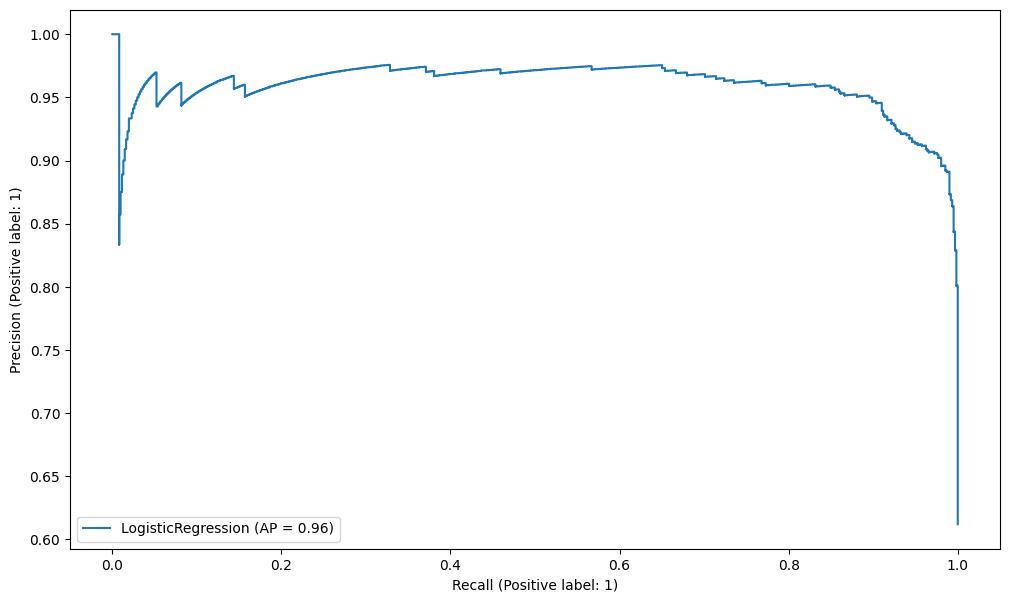

In [67]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);
# dengesiz datasetlerinde kullanırız.

## Not

Eger data balans data ise yani targetteki klass larin gozlem sayisi birbirine yakin ise 

# Final Model and Model Deployment

In [68]:
scaler = StandardScaler().fit(X)

In [70]:
import pickle # Modeli kaydetmek icin kullanilir.

In [78]:
pickle.dump(scaler, open("scaler_hearing", "wb"))

In [79]:
X_scaled = scaler.transform(X) 

In [80]:
final_model = LogisticRegression().fit(X_scaled, y)

In [81]:
pickle.dump(final_model, open("final_model_hearing", 'wb')) #transform ve fit ettiğimiz X datayı final olarak kayıt edilir.

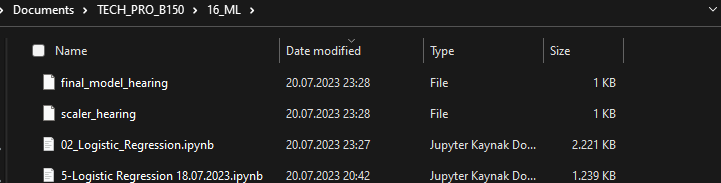

Lokalde wb (write binary ) yaptiginin resmidir

In [82]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [83]:
sample = pd.DataFrame(my_dict) # modele test etmek için dict içinde df oluşurulur.
sample

age  physical_score
0   20              50
1   30              30
2   40              20
3   50              10
4   60               5

In [84]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb")) # model load edilir

In [85]:
sample_scaled = scaler_hearing.transform(sample) # modele (scaler_hearing) df (sample) verilir
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [86]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [87]:
predictions = final_model.predict(sample_scaled) # final modele predict için scale edilen sample verilir
predictions_proba = final_model.predict_proba(sample_scaled) # samplenin proba değerlerini alırız

In [88]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

age  physical_score  pred  pred_proba
0   20              50     1       1.000
1   30              30     1       0.730
2   40              20     0       0.016
3   50              10     0       0.000
4   60               5     0       0.000